In [1]:
%reload_ext autoreload
%autoreload 2

import sys

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import matplotlib.transforms as mtransforms

mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerPathCollection
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

In [2]:
import matplotlib.font_manager as fm

TEXT_FONT_SIZE = 6
TITLE_FONT_SIZE = 6.5
MARKER_SIZE = 2
LINE_WIDTH = 1

plt.rcParams['font.size'] = TEXT_FONT_SIZE 
plt.rcParams['axes.linewidth'] = 0.2
plt.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['legend.fontsize'] = TEXT_FONT_SIZE 
mpl.rcParams['axes.titlesize'] = TITLE_FONT_SIZE 
mpl.rcParams['axes.labelsize'] = TEXT_FONT_SIZE 
plt.rcParams['axes.facecolor'] = '#F8F8F8'

# Define a list of colors for the color cycle
color_cycle = ['#AA4499', '#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#882255']

**Data initialization**

**Without resource constraint**

In [6]:
loaded_data = np.load("/media/data2/explosive_sync//Mouse brain network/mb_data_adaptive_a_0.01_b_0.npz")

# Access the arrays using the keys provided while saving
GLOBAL_ORDER_VERBOSE_NRC = loaded_data['arr1']
LAMBDA_O_NRC_ = loaded_data['arr2']
LAMBDA_NRC_ = loaded_data['arr3']

print("done")

done


In [7]:
# Add some random noise
noise = np.random.normal(loc=0.0, scale=0.006, size=LAMBDA_O_NRC_.shape)
LAMBDA_O_NRC_noise = LAMBDA_O_NRC_ + noise
print("done")

done


In [8]:
LAMBDA_O_fwd, idx_fwd = np.unique(LAMBDA_O_NRC_[:len(LAMBDA_O_NRC_)//2], return_index=True)
LAMBDA_O_bkwd, idx_bkwd = np.unique(LAMBDA_O_NRC_[len(LAMBDA_O_NRC_)//2:len(LAMBDA_O_NRC_)], return_index=True)

In [164]:
del loaded_data
del GLOBAL_ORDER_VERBOSE_NRC
del LAMBDA_NRC_
del LAMBDA_O_NRC_

**resource constraint**

In [9]:
loaded_data = np.load("/media/data2/explosive_sync//Mouse brain network/mb_data_adaptive_a_0.01_b_0.002.npz")

# Access the arrays using the keys provided while saving
GLOBAL_ORDER_VERBOSE_RC = loaded_data['arr1']
LAMBDA_O_RC_ = loaded_data['arr2']
LAMBDA_RC_ = loaded_data['arr3']

print("done")

done


In [10]:
# Add some random noise
print("start")
noise = np.random.normal(loc=0.0, scale=0.006, size=LAMBDA_O_RC_.shape)
LAMBDA_O_RC_noise = LAMBDA_O_RC_ + noise
print("done")

start
done


In [162]:
#del loaded_data
del GLOBAL_ORDER_VERBOSE_RC
del LAMBDA_O_RC_
del LAMBDA_RC_

In [11]:
# Assymetric
loaded_data = np.load("../Scale-free network/mb_data_fdc_a_0.01_b_0.002_tr_weighted.npz")

# Access the arrays using the keys provided while saving
arr1 = loaded_data['arr1']
arr2 = loaded_data['arr2']

GLOBAL_ORDER_VERBOSE_WT_DIR = arr1
LAMBDA_O_WT_DIR = arr2

print("done")

FileNotFoundError: [Errno 2] No such file or directory: '../Scale-free network/mb_data_fdc_a_0.01_b_0.002_tr_weighted.npz'

In [ ]:
# Add some random noise
print("start")
noise = np.random.normal(loc=0.0, scale=0.2, size=LAMBDA_O_WT_DIR.shape)
LAMBDA_O_WT_DIR_noise = LAMBDA_O_WT_DIR + noise
print("done")

In [4]:
# Assymetric
loaded_data = np.load("../Binary Mouse brain network/mb_binary_data_adaptive_a_0.01_b_0_tr-in-out-degree.npz")

# Access the arrays using the keys provided while saving
arr1 = loaded_data['arr1']
arr2 = loaded_data['arr2']

GLOBAL_ORDER_VERBOSE_BIN = arr1
LAMBDA_O_BIN = arr2

print("done")

done


In [6]:
# Binarized
loaded_data = np.load("../Binary Mouse brain network/mb_binary_data_adaptive_a_0.01_b_0_tr.npz")

# Access the arrays using the keys provided while saving
arr1 = loaded_data['arr1']
arr2 = loaded_data['arr2']

GLOBAL_ORDER_VERBOSE_BIN = arr1
LAMBDA_O_BIN = arr2

print("done")

done


**Synchronization Window**

In [12]:
WINDOW_SIZE = 40000
unique_lambda_o = np.unique(np.around(LAMBDA_O_RC_, 2))
reversed_array = np.flip(unique_lambda_o)[1:]
unique_lambda_o = np.concatenate([unique_lambda_o, reversed_array])[1:]

# Define window size and stride
window_size = 40000
stride = 40000
num_bins = 10
th_global_order = 0.4

# Calculate number of windows
num_windows = int((len(GLOBAL_ORDER_VERBOSE_RC) - window_size) / stride) + 1
print(num_windows)

# Initialize array to store window distributions
window_distributions = np.zeros((num_windows, num_bins)) # assuming 101 bins for the histogram

#Average synchronized time
window_avg_synchronized = np.zeros(num_windows)

# Iterate through time series with sliding window
for i in range(num_windows):
    #print(i)
    # Extract data for current window
    window_data = GLOBAL_ORDER_VERBOSE_RC[i*stride:i*stride+window_size]
    
    # Calculate histogram of global order within window
    window_histogram, bin_edges = np.histogram(window_data, bins=num_bins, range=(0, 1))
    
    # Normalize histogram
    #window_histogram = window_histogram / np.sum(window_histogram)
    
    # Fraction of points which crossed threshold for global synchrony
    avg_synchronized = np.count_nonzero(np.where(window_data > th_global_order)) / window_size
    
    # Store normalized histogram in array
    window_distributions[i,:] = window_histogram
    
    window_avg_synchronized[i] = avg_synchronized

print("done")

window_distributions.shape
bin_edges = np.around(bin_edges, 2)
unique_lambda_o.shape

100
done


(100,)

**Plot Graph**

In [13]:
# Define the sigmoid function
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-(x-b)/c))

In [ ]:
import seaborn as sns
# sns.set_style("dark")
sns.set_style("white", {"axes.labelsize": 12}) # {"axes.facecolor": '#F8F8F8'} {"grid.color": ".6", "grid.linestyle": ":", "grid.linewidth": "0.2"}

style_dict = sns.axes_style()
style_dict['xtick.bottom'] = True
style_dict['ytick.left'] = True
style_dict['xtick.color'] = '0'
style_dict['ytick.color'] = '0'
sns.set_style(style_dict)


# sns.set()
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(3.42, 2.5), dpi=2000) #2000
fig.set_constrained_layout(True)

subfigs = fig.subfigures(2, 1, height_ratios=[1, 1])

gs = GridSpec(1, 2, width_ratios=[1, 1.31], figure=subfigs[0])
ax1 = subfigs[0].add_subplot(gs[0]) # hysteresis
ax2 = subfigs[0].add_subplot(gs[1]) # bistable

gs1 = GridSpec(1, 2, width_ratios=[1, 1], figure=subfigs[1])

ax3 = subfigs[1].add_subplot(gs1[0]) #phase plot
ax4 = subfigs[1].add_subplot(gs1[1]) # transient




lambda_thr = 2.7 #2.69
start = 3215000 - 40000 #800000
end = start + 60000
DT = 0.05
peak_sync_time = 3217300
indices = np.where(LAMBDA_RC_[:, peak_sync_time] < lambda_thr)
MEAN_LAMBDA = np.mean(LAMBDA_RC_[indices[0], start:end], axis=0) #Modified

color_272 = 'purple' # purple  C4
color_278 = 'tab:orange' #'C3' # orange  C1
color_282 = 'green' #'C2' # green C2
color_288 = 'red' #'C1' # C5

color_no_rc_fwd = "red"
color_no_rc_bkwd = "blue"
color_rc = "C0"


"""
----------------------------------------------------------------------------
No resource constraint
----------------------------------------------------------------------------
"""
ax1.set_xlabel('Fixed resources (Λ)', weight='bold')
ax1.set_ylabel('Global \nsynchrony (R)', weight='bold')
ax1.scatter(LAMBDA_O_NRC_noise, 
            GLOBAL_ORDER_VERBOSE_NRC, 
            s=0.001, alpha=0.01)
ax1.set_ylim(top=0.8)


"""
----------------------------------------------------------------------------
With constraint
----------------------------------------------------------------------------
"""

# ax2.set_ylabel('Global \nsynchrony (R)', weight='bold')
ax2.scatter(LAMBDA_O_RC_noise, GLOBAL_ORDER_VERBOSE_RC, s=0.001, alpha=0.01)
ax2.set_xlabel(r'Resource reserve (λ$_o$)', weight='bold')
ax2.set_ylim(top=0.8)
ax2.axvline(2.78, color=color_278, linestyle="--", linewidth=0.5*LINE_WIDTH)
ax2.text(0.30, 0.38, r'λ$_o$=2.78', transform=ax2.transAxes, rotation=90)
ax2.set_yticklabels('')

ax_zoom2 = ax2.inset_axes([0.65, 0.22, 0.3, 0.33])

ax_zoom2.set_ylabel(r'$\langle t_s \rangle$', labelpad=-5)
ax_zoom2.set_xlabel(r'λ$_o$', labelpad=-10)

n = len(window_avg_synchronized)
first_half = window_avg_synchronized[:n//2]
second_half = window_avg_synchronized[n//2:][::-1]
avg = (first_half + second_half) / 2
lambda_first_half = np.unique(unique_lambda_o)[1:]

start_idx = 14
end_idx = 29
ax_zoom2.scatter(unique_lambda_o, 
                 window_avg_synchronized, s=0.1)
ax_zoom2.scatter(2.78, window_avg_synchronized[18] + 0.1, 
                 color=color_278, s=1, marker="^")
ax_zoom2.set_xlim(2.7, 3)
ax_zoom2.set_xlim(unique_lambda_o[start_idx], unique_lambda_o[end_idx])
ax_zoom2.set_xticks([unique_lambda_o[start_idx], unique_lambda_o[end_idx]])
ax_zoom2.set_xticklabels([2.7, 3], fontsize=TEXT_FONT_SIZE-1)
ax_zoom2.set_yticks([0, 1])
ax_zoom2.set_yticklabels([0, 1], fontsize=TEXT_FONT_SIZE-1)


"""
----------------------------------------------------------------------------
Transient ES
----------------------------------------------------------------------------
"""
# ax4.set_title(' ')
ax4.text(0.4, 0.9, r'λ$_o$='+str(np.around(LAMBDA_O_RC_[start+40000], 3))
         , transform=ax4.transAxes)
ax4.set_xlabel('time (a.u.)\n ', weight='bold')
# ax4.set_ylabel('Global \nsynchrony (R)', weight='bold')
ax4.set_yticklabels('')
ax4.plot(np.linspace(0, end-start-1, end-start)*DT, GLOBAL_ORDER_VERBOSE_RC[start:end], 
         color=color_278, alpha=1, linewidth=0.5*LINE_WIDTH)
ax4.tick_params(axis='y', labelcolor=color_278)
ax4.set_ylim(top=0.8)

color = 'blue'
ax4_ = ax4.twinx()
ax4_.set_ylabel('Mean resource ⟨λ⟩', weight='bold')
ax4_.plot(np.linspace(0, end-start-1, end-start)*DT, MEAN_LAMBDA, color=color, 
          linestyle='solid', alpha=0.8, linewidth=0.5*LINE_WIDTH)
ax4_.tick_params(axis='y', labelcolor=color)
ax4_.set_ylim(2.6, np.max(MEAN_LAMBDA)+0.04) #+0.02


"""
----------------------------------------------------------------------------
Bistability
----------------------------------------------------------------------------
"""
ax3.set_xlabel('Mean resource ⟨λ⟩', weight='bold')
ax3.set_ylabel('Global \nsynchrony (R)', weight='bold')

start_time_idx = 800000 - 240000
end_time_idx = start_time_idx + 40000
mean_lambda = np.mean(LAMBDA_RC_[:, start_time_idx:end_time_idx], axis=0)
ax3.scatter(mean_lambda, GLOBAL_ORDER_VERBOSE_RC[start_time_idx:end_time_idx], s=0.002, 
            label=str(np.around(LAMBDA_O_RC_[start_time_idx], 3)), color=color_272 )

start_time_idx = 3215000
end_time_idx = start_time_idx + 20000
peak_sync_time = 3217300
indices = np.where(LAMBDA_RC_[:, peak_sync_time] < lambda_thr)
mean_lambda = np.mean(LAMBDA_RC_[indices[0], start_time_idx:end_time_idx], axis=0)

ax3.scatter(mean_lambda, GLOBAL_ORDER_VERBOSE_RC[start_time_idx:end_time_idx], s=0.002, 
            label=str(np.around(LAMBDA_O_RC_[start_time_idx], 3)), color=color_278 )

start_time_idx = 800000
end_time_idx = start_time_idx + 40000
peak_sync_time = 800000 + 30000
indices = np.where(LAMBDA_RC_[:, peak_sync_time] < lambda_thr)
mean_lambda = np.mean(LAMBDA_RC_[indices[0], start_time_idx:end_time_idx], axis=0)

ax3.scatter(mean_lambda, GLOBAL_ORDER_VERBOSE_RC[start_time_idx:end_time_idx], s=0.002, 
            label=str(np.around(LAMBDA_O_RC_[start_time_idx], 3)), color=color_282)

start_time_idx = 940000
end_time_idx = start_time_idx + 21000
peak_sync_time = 940000
indices = np.where(LAMBDA_RC_[:, peak_sync_time] < lambda_thr)
mean_lambda = np.mean(LAMBDA_RC_[indices[0], start_time_idx:end_time_idx], axis=0)

ax3.scatter(mean_lambda, GLOBAL_ORDER_VERBOSE_RC[start_time_idx:end_time_idx], s=0.002, 
            label=str(np.around(LAMBDA_O_RC_[start_time_idx], 3)), color=color_288 )

legend = ax3.legend(bbox_to_anchor=(1.035, 1.02), loc=1, 
                    handletextpad=-0.3,
                    frameon=False, markerscale=10)
legend.set_title(r'λ$_o$')
ax3.set_xlim(left=2.63, right=2.85)
ax3.set_ylim(top=0.8)
ax3.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

plt.show()

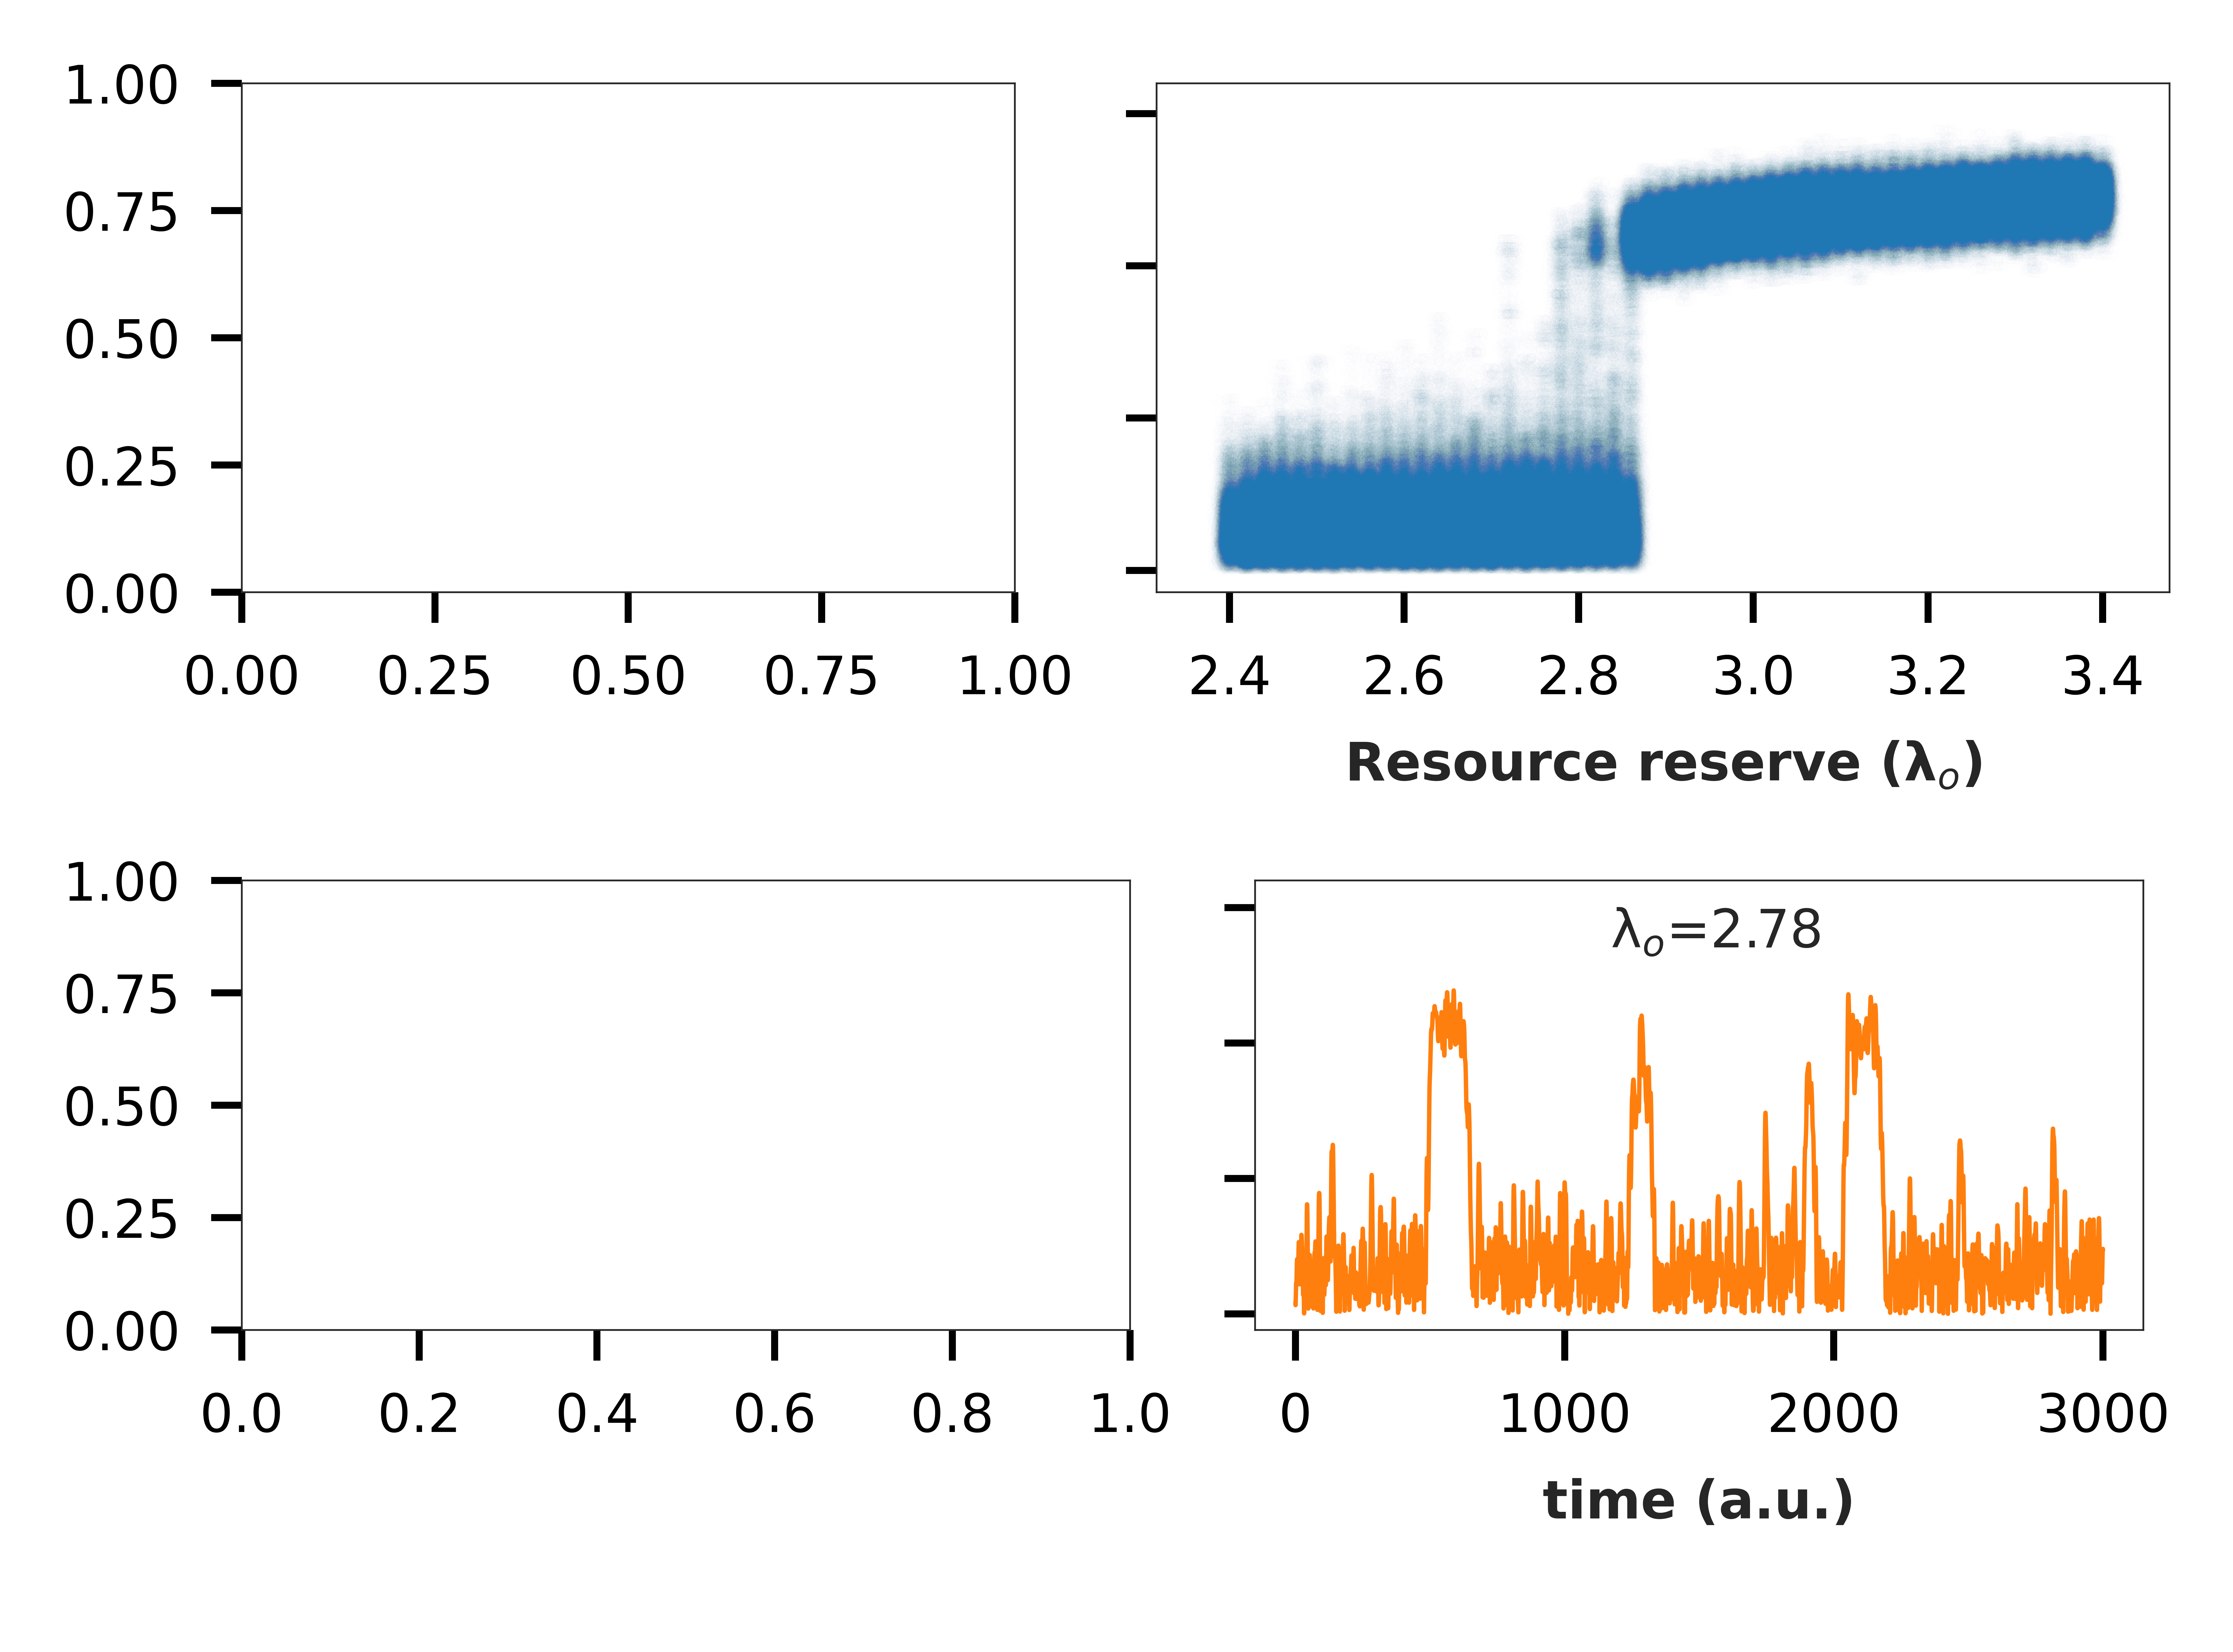

In [15]:
import seaborn as sns
# sns.set_style("dark")
sns.set_style("white", {"axes.labelsize": 12}) # {"axes.facecolor": '#F8F8F8'} {"grid.color": ".6", "grid.linestyle": ":", "grid.linewidth": "0.2"}

style_dict = sns.axes_style()
style_dict['xtick.bottom'] = True
style_dict['ytick.left'] = True
style_dict['xtick.color'] = '0'
style_dict['ytick.color'] = '0'
sns.set_style(style_dict)


# sns.set()
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(3.42, 2.5), dpi=2000) #2000
fig.set_constrained_layout(True)

subfigs = fig.subfigures(2, 1, height_ratios=[1, 1])

gs = GridSpec(1, 2, width_ratios=[1, 1.31], figure=subfigs[0])
ax1 = subfigs[0].add_subplot(gs[0]) # hysteresis
ax2 = subfigs[0].add_subplot(gs[1]) # bistable

gs1 = GridSpec(1, 2, width_ratios=[1, 1], figure=subfigs[1])

ax3 = subfigs[1].add_subplot(gs1[0]) #phase plot
ax4 = subfigs[1].add_subplot(gs1[1]) # transient




# lambda_thr = 2.7 #2.69
# start = 3215000 - 40000 #800000
# end = start + 60000
# DT = 0.05
# peak_sync_time = 3217300
# indices = np.where(LAMBDA_RC_[:, peak_sync_time] < lambda_thr)
# MEAN_LAMBDA = np.mean(LAMBDA_RC_[indices[0], start:end], axis=0) #Modified

color_272 = 'purple' # purple  C4
color_278 = 'tab:orange' #'C3' # orange  C1
color_282 = 'green' #'C2' # green C2
color_288 = 'red' #'C1' # C5

color_no_rc_fwd = "red"
color_no_rc_bkwd = "blue"
color_rc = "C0"


"""
----------------------------------------------------------------------------
No resource constraint
----------------------------------------------------------------------------
"""
# ax1.set_xlabel('Fixed resources (Λ)', weight='bold')
# ax1.set_ylabel('Global \nsynchrony (R)', weight='bold')
# ax1.scatter(LAMBDA_O_NRC_noise, 
#             GLOBAL_ORDER_VERBOSE_NRC, 
#             s=0.001, alpha=0.01)
# ax1.set_ylim(top=0.8)


"""
----------------------------------------------------------------------------
With constraint
----------------------------------------------------------------------------
"""

# ax2.set_ylabel('Global \nsynchrony (R)', weight='bold')
ax2.scatter(LAMBDA_O_RC_noise, GLOBAL_ORDER_VERBOSE_RC, s=0.001, alpha=0.01)
ax2.set_xlabel(r'Resource reserve (λ$_o$)', weight='bold')
ax2.set_ylim(top=0.8)
# ax2.axvline(2.78, color=color_278, linestyle="--", linewidth=0.5*LINE_WIDTH)
# ax2.text(0.30, 0.38, r'λ$_o$=2.78', transform=ax2.transAxes, rotation=90)
ax2.set_yticklabels('')

# ax_zoom2 = ax2.inset_axes([0.65, 0.22, 0.3, 0.33])

# ax_zoom2.set_ylabel(r'$\langle t_s \rangle$', labelpad=-5)
# ax_zoom2.set_xlabel(r'λ$_o$', labelpad=-10)

# n = len(window_avg_synchronized)
# first_half = window_avg_synchronized[:n//2]
# second_half = window_avg_synchronized[n//2:][::-1]
# avg = (first_half + second_half) / 2
# lambda_first_half = np.unique(unique_lambda_o)[1:]

# start_idx = 14
# end_idx = 29
# ax_zoom2.scatter(unique_lambda_o, 
#                  window_avg_synchronized, s=0.1)
# ax_zoom2.scatter(2.78, window_avg_synchronized[18] + 0.1, 
#                  color=color_278, s=1, marker="^")
# ax_zoom2.set_xlim(2.7, 3)
# ax_zoom2.set_xlim(unique_lambda_o[start_idx], unique_lambda_o[end_idx])
# ax_zoom2.set_xticks([unique_lambda_o[start_idx], unique_lambda_o[end_idx]])
# ax_zoom2.set_xticklabels([2.7, 3], fontsize=TEXT_FONT_SIZE-1)
# ax_zoom2.set_yticks([0, 1])
# ax_zoom2.set_yticklabels([0, 1], fontsize=TEXT_FONT_SIZE-1)


"""
----------------------------------------------------------------------------
Transient ES
----------------------------------------------------------------------------
"""
# ax4.set_title(' ')
ax4.text(0.4, 0.85, r'λ$_o$='+str(np.around(LAMBDA_O_RC_[start+40000], 3))
         , transform=ax4.transAxes)
ax4.set_xlabel('time (a.u.)\n ', weight='bold')
# ax4.set_ylabel('Global \nsynchrony (R)', weight='bold')
ax4.set_yticklabels('')
ax4.plot(np.linspace(0, end-start-1, end-start)*DT, GLOBAL_ORDER_VERBOSE_RC[start:end], 
         color=color_278, alpha=1, linewidth=0.5*LINE_WIDTH)
ax4.tick_params(axis='y', labelcolor=color_278)
ax4.set_ylim(top=0.8)

# color = 'blue'
# ax4_ = ax4.twinx()
# ax4_.set_ylabel('Mean resource ⟨λ⟩', weight='bold')
# ax4_.plot(np.linspace(0, end-start-1, end-start)*DT, MEAN_LAMBDA, color=color, 
#           linestyle='solid', alpha=0.8, linewidth=0.5*LINE_WIDTH)
# ax4_.tick_params(axis='y', labelcolor=color)
# ax4_.set_ylim(2.6, np.max(MEAN_LAMBDA)+0.04) #+0.02


"""
----------------------------------------------------------------------------
Bistability
----------------------------------------------------------------------------
"""
# ax3.set_xlabel('Mean resource ⟨λ⟩', weight='bold')
# ax3.set_ylabel('Global \nsynchrony (R)', weight='bold')

# start_time_idx = 800000 - 240000
# end_time_idx = start_time_idx + 40000
# mean_lambda = np.mean(LAMBDA_RC_[:, start_time_idx:end_time_idx], axis=0)
# ax3.scatter(mean_lambda, GLOBAL_ORDER_VERBOSE_RC[start_time_idx:end_time_idx], s=0.002, 
#             label=str(np.around(LAMBDA_O_RC_[start_time_idx], 3)), color=color_272 )

# start_time_idx = 3215000
# end_time_idx = start_time_idx + 20000
# peak_sync_time = 3217300
# indices = np.where(LAMBDA_RC_[:, peak_sync_time] < lambda_thr)
# mean_lambda = np.mean(LAMBDA_RC_[indices[0], start_time_idx:end_time_idx], axis=0)

# ax3.scatter(mean_lambda, GLOBAL_ORDER_VERBOSE_RC[start_time_idx:end_time_idx], s=0.002, 
#             label=str(np.around(LAMBDA_O_RC_[start_time_idx], 3)), color=color_278 )

# start_time_idx = 800000
# end_time_idx = start_time_idx + 40000
# peak_sync_time = 800000 + 30000
# indices = np.where(LAMBDA_RC_[:, peak_sync_time] < lambda_thr)
# mean_lambda = np.mean(LAMBDA_RC_[indices[0], start_time_idx:end_time_idx], axis=0)

# ax3.scatter(mean_lambda, GLOBAL_ORDER_VERBOSE_RC[start_time_idx:end_time_idx], s=0.002, 
#             label=str(np.around(LAMBDA_O_RC_[start_time_idx], 3)), color=color_282)

# start_time_idx = 940000
# end_time_idx = start_time_idx + 21000
# peak_sync_time = 940000
# indices = np.where(LAMBDA_RC_[:, peak_sync_time] < lambda_thr)
# mean_lambda = np.mean(LAMBDA_RC_[indices[0], start_time_idx:end_time_idx], axis=0)

# ax3.scatter(mean_lambda, GLOBAL_ORDER_VERBOSE_RC[start_time_idx:end_time_idx], s=0.002, 
#             label=str(np.around(LAMBDA_O_RC_[start_time_idx], 3)), color=color_288 )

# legend = ax3.legend(bbox_to_anchor=(1.035, 1.02), loc=1, 
#                     handletextpad=-0.3,
#                     frameon=False, markerscale=10)
# legend.set_title(r'λ$_o$')
# ax3.set_xlim(left=2.63, right=2.85)
# ax3.set_ylim(top=0.8)
# ax3.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

plt.show()

**Binary-directed**

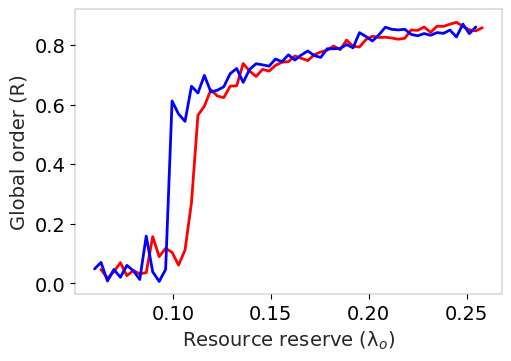

In [20]:
import seaborn as sns
# sns.set_style("dark")
sns.set_style("white", {"axes.labelsize": 12}) # {"axes.facecolor": '#F8F8F8'} {"grid.color": ".6", "grid.linestyle": ":", "grid.linewidth": "0.2"}

style_dict = sns.axes_style()
style_dict['xtick.bottom'] = True
style_dict['ytick.left'] = True
style_dict['xtick.color'] = '0'
style_dict['ytick.color'] = '0'
sns.set_style(style_dict)

fig = plt.figure(figsize=(5, 3.5))
fig.set_constrained_layout(True)

LAMBDA_O_fwd, idx_fwd = np.unique(LAMBDA_O_BIN[:len(LAMBDA_O_BIN)//2], return_index=True)
LAMBDA_O_bkwd, idx_bkwd = np.unique(LAMBDA_O_BIN[len(LAMBDA_O_BIN)//2:len(LAMBDA_O_BIN)], return_index=True)

# plt.scatter(LAMBDA_O_BIN, GLOBAL_ORDER_VERBOSE_BIN)
plt.plot(LAMBDA_O_fwd, GLOBAL_ORDER_VERBOSE_BIN[idx_fwd], color="red")
plt.plot(LAMBDA_O_bkwd, GLOBAL_ORDER_VERBOSE_BIN[len(LAMBDA_O_BIN)//2 + idx_bkwd], "blue") 
plt.xlabel(r'Resource reserve (λ$_o$)') 
plt.ylabel("Global order (R)")
plt.show()

**Binary-undirected**

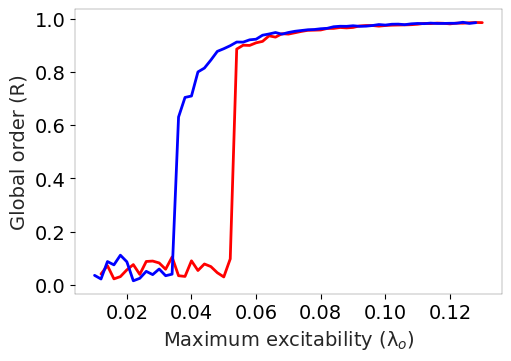

In [8]:
import seaborn as sns
# sns.set_style("dark")
sns.set_style("white", {"axes.labelsize": 12}) # {"axes.facecolor": '#F8F8F8'} {"grid.color": ".6", "grid.linestyle": ":", "grid.linewidth": "0.2"}

style_dict = sns.axes_style()
style_dict['xtick.bottom'] = True
style_dict['ytick.left'] = True
style_dict['xtick.color'] = '0'
style_dict['ytick.color'] = '0'
sns.set_style(style_dict)

fig = plt.figure(figsize=(5, 3.5))
fig.set_constrained_layout(True)

LAMBDA_O_fwd, idx_fwd = np.unique(LAMBDA_O_BIN[:len(LAMBDA_O_BIN)//2], return_index=True)
LAMBDA_O_bkwd, idx_bkwd = np.unique(LAMBDA_O_BIN[len(LAMBDA_O_BIN)//2:len(LAMBDA_O_BIN)], return_index=True)

# plt.scatter(LAMBDA_O_BIN, GLOBAL_ORDER_VERBOSE_BIN)
plt.plot(LAMBDA_O_fwd, GLOBAL_ORDER_VERBOSE_BIN[idx_fwd], color="red")
plt.plot(LAMBDA_O_bkwd, GLOBAL_ORDER_VERBOSE_BIN[len(LAMBDA_O_BIN)//2 + idx_bkwd], "blue") 
plt.xlabel(r'Maximum excitability (λ$_o$)') 
plt.ylabel("Global order (R)")
plt.show()